# Evaluation pretrained embeddings

In [1]:
%config InlineBackend.figure_format='retina'
import warnings
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')
print(eKonf.__version__)

0.1.32+0.g25255f6.dirty


In [2]:
data_dir = "../data/embeddings"
save_dataframe = eKonf.partial(
    config_group="_func_/save_dataframe", output_dir=data_dir
)
load_dataframe = eKonf.partial(config_group="_func_/load_dataframe", data_dir=data_dir)

## Load GloVE Vectors

### Wikipedia 

In [3]:
cfg = eKonf.compose(config_group="model/embedding")
cfg.name = "glove_wiki"
cfg.corpus = "Wikipedia"
cfg.cache.uri = "https://nlp.stanford.edu/data/glove.6B.zip"
cfg.model_dir = cfg.cache.path
cfg.model_file = "glove.6B.300d.txt"
cfg.model_type = "glove"
wv_wiki = eKonf.instantiate(cfg)
wv_wiki.load()

INFO:cached_path:cache of https://nlp.stanford.edu/data/glove.6B.zip is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /workspace/.cache/cached_path/d97dcf99e9ed61e3b07a5a87dd5dea7b6a4815ba6eb1ac87f529bfe6e2ba4ccf.f9662ccb99e715467e6da0c85a047cfc51888321958f9440eb5a15f7189c140f-extracted
INFO:cached_path:cache of https://nlp.stanford.edu/data/glove.6B.zip is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /workspace/.cache/cached_path/d97dcf99e9ed61e3b07a5a87dd5dea7b6a4815ba6eb1ac87f529bfe6e2ba4ccf.f9662ccb99e715467e6da0c85a047cfc51888321958f9440eb5a15f7189c140f-extracted
INFO:cached_path:cache of https://raw.githubusercontent.com/RaRe-Technologies/gensim/develop/gensim/test/test_data/questions-words.txt is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /root/.ekorpkit/.cache/cached_path/7568e1428a2ba53a33f67dea7e276f212c065b07d102aafc177a507d244161f6.f60f7f82aaacf3a534d93013617bcfead46a795268096ff1990608b16115b566
INFO:gensim.models.keyedvectors:loading projection wei

In [4]:
wiki_score, wiki_eval, wiki_sections = wv_wiki.evaluate_word_analogies(analogies="google")
wiki_eval.head()

INFO:gensim.models.keyedvectors:Evaluating word analogies for top 300000 words in the model on /root/.ekorpkit/.cache/cached_path/7568e1428a2ba53a33f67dea7e276f212c065b07d102aafc177a507d244161f6.f60f7f82aaacf3a534d93013617bcfead46a795268096ff1990608b16115b566
INFO:gensim.models.keyedvectors:capital-common-countries: 94.9% (480/506)
INFO:gensim.models.keyedvectors:capital-world: 96.0% (4342/4524)
INFO:gensim.models.keyedvectors:currency: 17.1% (138/808)
INFO:gensim.models.keyedvectors:city-in-state: 59.3% (1463/2467)
INFO:gensim.models.keyedvectors:family: 88.1% (446/506)
INFO:gensim.models.keyedvectors:gram1-adjective-to-adverb: 22.6% (224/992)
INFO:gensim.models.keyedvectors:gram2-opposite: 27.3% (222/812)
INFO:gensim.models.keyedvectors:gram3-comparative: 88.1% (1174/1332)
INFO:gensim.models.keyedvectors:gram4-superlative: 72.2% (810/1122)
INFO:gensim.models.keyedvectors:gram5-present-participle: 70.0% (739/1056)
INFO:gensim.models.keyedvectors:gram6-nationality-adjective: 92.6% (148

,Category,Correct,Incorrect,Samples,Average,Corpus
0,Capitals,480,26,506,0.948617,Wikipedia
1,Capitals RoW,4342,182,4524,0.959770,Wikipedia
2,Currency,138,670,808,0.170792,Wikipedia
3,City-State,1463,1004,2467,0.593028,Wikipedia
4,Famliy,446,60,506,0.881423,Wikipedia


### Twitter Data

In [7]:
cfg = eKonf.compose(config_group="model/embedding")
cfg.name = "glove_twitter"
cfg.corpus = "Twitter"
cfg.cache.uri = "https://nlp.stanford.edu/data/glove.twitter.27B.zip"
cfg.model_dir = cfg.cache.path
cfg.model_file = "glove.twitter.27B.200d.txt"
cfg.model_type = "glove"
wv_twt = eKonf.instantiate(cfg)
wv_twt.load()

INFO:cached_path:cache of https://nlp.stanford.edu/data/glove.twitter.27B.zip is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /workspace/.cache/cached_path/d08f2221566196fe3fd6f557a2b67e9ffd5cf4b7c500918d98581a52f349a804.7417464dae8ba25e69e639021d320765d2d18bb24f73391ef423756069dc8078-extracted
INFO:cached_path:cache of https://nlp.stanford.edu/data/glove.twitter.27B.zip is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /workspace/.cache/cached_path/d08f2221566196fe3fd6f557a2b67e9ffd5cf4b7c500918d98581a52f349a804.7417464dae8ba25e69e639021d320765d2d18bb24f73391ef423756069dc8078-extracted
INFO:cached_path:cache of https://raw.githubusercontent.com/RaRe-Technologies/gensim/develop/gensim/test/test_data/questions-words.txt is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /root/.ekorpkit/.cache/cached_path/7568e1428a2ba53a33f67dea7e276f212c065b07d102aafc177a507d244161f6.f60f7f82aaacf3a534d93013617bcfead46a795268096ff1990608b16115b566
INFO:gensim.models.keyedvectors:load

In [8]:
twt_score, twt_eval, twt_sections = wv_twt.evaluate_word_analogies(analogies="google")
twt_eval.head()

INFO:gensim.models.keyedvectors:Evaluating word analogies for top 300000 words in the model on /root/.ekorpkit/.cache/cached_path/7568e1428a2ba53a33f67dea7e276f212c065b07d102aafc177a507d244161f6.f60f7f82aaacf3a534d93013617bcfead46a795268096ff1990608b16115b566
INFO:gensim.models.keyedvectors:capital-common-countries: 70.6% (357/506)
INFO:gensim.models.keyedvectors:capital-world: 74.6% (1639/2198)
INFO:gensim.models.keyedvectors:currency: 3.3% (15/458)
INFO:gensim.models.keyedvectors:city-in-state: 35.6% (879/2467)
INFO:gensim.models.keyedvectors:family: 79.5% (302/380)
INFO:gensim.models.keyedvectors:gram1-adjective-to-adverb: 12.7% (118/930)
INFO:gensim.models.keyedvectors:gram2-opposite: 30.8% (185/600)
INFO:gensim.models.keyedvectors:gram3-comparative: 74.2% (989/1332)
INFO:gensim.models.keyedvectors:gram4-superlative: 64.0% (718/1122)
INFO:gensim.models.keyedvectors:gram5-present-participle: 66.4% (701/1056)
INFO:gensim.models.keyedvectors:gram6-nationality-adjective: 72.7% (894/122

,Category,Samples,Average,Corpus
0,Capitals,506,0.705534,Twitter
1,Capitals RoW,2198,0.745678,Twitter
2,Currency,458,0.032751,Twitter
3,City-State,2467,0.356303,Twitter
4,Famliy,380,0.794737,Twitter


### Common Crawl

In [9]:
cfg = eKonf.compose(config_group="model/embedding")
cfg.name = "glove_commoncrawl"
cfg.corpus = "Common Crawl"
cfg.cache.uri = "https://nlp.stanford.edu/data/glove.42B.300d.zip"
cfg.model_dir = cfg.cache.path
cfg.model_file = "glove.42B.300d.txt"
cfg.model_type = "glove"
wv_cc = eKonf.instantiate(cfg)
wv_cc.load()

INFO:cached_path:cache of https://nlp.stanford.edu/data/glove.42B.300d.zip is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /workspace/.cache/cached_path/1b77e307d0976680276bd5eddffac55a83164787611dccb81aaaab9c4c79073b.d4304a004cdd3b0267ad688b5fc4d6c9d43c622a571ee2ba8b39604fc257faed-extracted
INFO:cached_path:cache of https://nlp.stanford.edu/data/glove.42B.300d.zip is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /workspace/.cache/cached_path/1b77e307d0976680276bd5eddffac55a83164787611dccb81aaaab9c4c79073b.d4304a004cdd3b0267ad688b5fc4d6c9d43c622a571ee2ba8b39604fc257faed-extracted
INFO:cached_path:cache of https://raw.githubusercontent.com/RaRe-Technologies/gensim/develop/gensim/test/test_data/questions-words.txt is up-to-date
INFO:ekorpkit.io.cached_path:cached path: /root/.ekorpkit/.cache/cached_path/7568e1428a2ba53a33f67dea7e276f212c065b07d102aafc177a507d244161f6.f60f7f82aaacf3a534d93013617bcfead46a795268096ff1990608b16115b566
INFO:gensim.models.keyedvectors:loading pr

In [10]:
cc_score, cc_eval, cc_sections = wv_cc.evaluate_word_analogies(analogies="google")
cc_eval.head()

INFO:gensim.models.keyedvectors:Evaluating word analogies for top 300000 words in the model on /root/.ekorpkit/.cache/cached_path/7568e1428a2ba53a33f67dea7e276f212c065b07d102aafc177a507d244161f6.f60f7f82aaacf3a534d93013617bcfead46a795268096ff1990608b16115b566
INFO:gensim.models.keyedvectors:capital-common-countries: 95.1% (481/506)
INFO:gensim.models.keyedvectors:capital-world: 94.0% (4178/4446)
INFO:gensim.models.keyedvectors:currency: 17.6% (142/808)
INFO:gensim.models.keyedvectors:city-in-state: 78.1% (1926/2467)
INFO:gensim.models.keyedvectors:family: 90.9% (460/506)
INFO:gensim.models.keyedvectors:gram1-adjective-to-adverb: 30.2% (300/992)
INFO:gensim.models.keyedvectors:gram2-opposite: 35.6% (289/812)
INFO:gensim.models.keyedvectors:gram3-comparative: 85.6% (1140/1332)
INFO:gensim.models.keyedvectors:gram4-superlative: 84.0% (942/1122)
INFO:gensim.models.keyedvectors:gram5-present-participle: 80.9% (854/1056)
INFO:gensim.models.keyedvectors:gram6-nationality-adjective: 88.3% (141

,Category,Samples,Average,Corpus
0,Capitals,506,0.950593,Common Crawl
1,Capitals RoW,4446,0.939721,Common Crawl
2,Currency,808,0.175743,Common Crawl
3,City-State,2467,0.780705,Common Crawl
4,Famliy,506,0.909091,Common Crawl


## Evaluate embeddings

In [11]:
import pandas as pd
eval_results = pd.concat([wiki_eval, twt_eval, cc_eval])
save_dataframe(eval_results, output_file="eval_results.parquet")

INFO:ekorpkit.io.file:Saving dataframe as ../data/embeddings/eval_results.parquet


In [12]:
eval_results = load_dataframe(data_file="eval_results.parquet")
eval_results.head()

INFO:ekorpkit.io.file:Loading data from ../data/embeddings/eval_results.parquet


,Category,Samples,Average,Corpus
0,Capitals,506,0.948617,Wikipedia
1,Capitals RoW,4524,0.959770,Wikipedia
2,Currency,808,0.170792,Wikipedia
3,City-State,2467,0.593028,Wikipedia
4,Famliy,506,0.881423,Wikipedia


INFO:ekorpkit.visualize.plot:Plotting barplot with {'x': 'Category', 'y': 'Average', 'hue': 'Corpus'}
INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_BarPlot.png


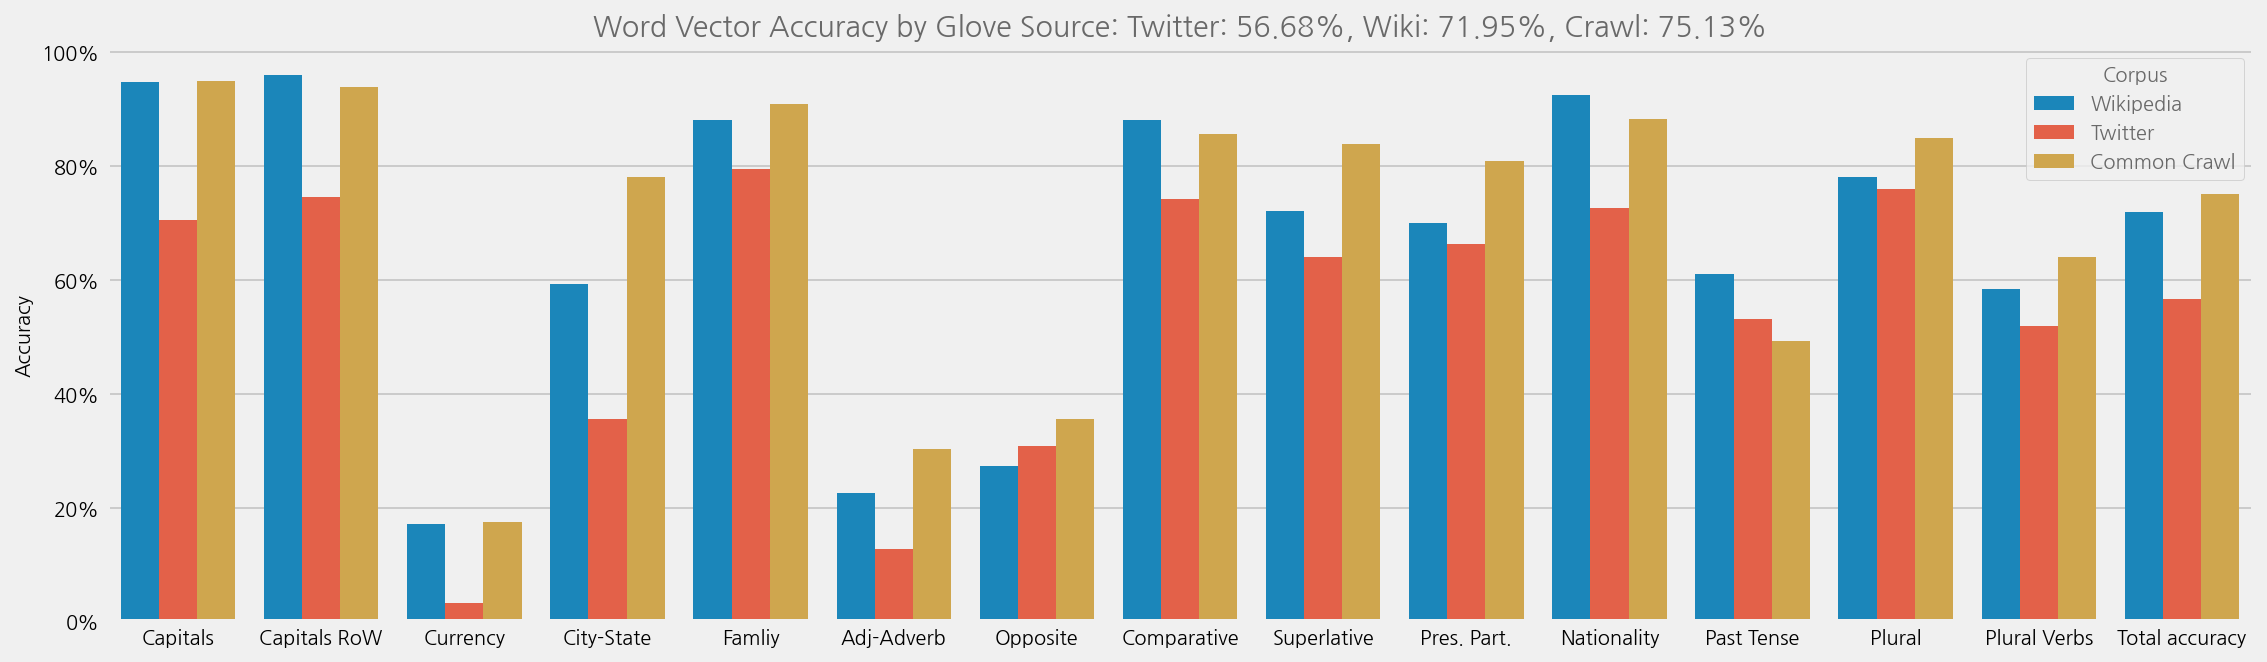

In [13]:
cfg = eKonf.compose(config_group="visualize/plot=barplot")
cfg.plots[0].x = "Category"
cfg.plots[0].y = "Average"
cfg.plots[0].hue = "Corpus"
cfg.ax.ytickmajorformatterfunc = "lambda y, _: '{:.0%}'.format(y)"
cfg.ax.ylabel = "Accuracy"
cfg.figure.figsize = (16, 5)
cfg.figure.fontsize = 10
cfg.ax.title = f"Word Vector Accuracy by Glove Source: Twitter: {twt_score:.2%}, Wiki: {wiki_score:.2%}, Crawl: {cc_score:.2%}"
eKonf.instantiate(cfg, data=eval_results)

## Visualize Embeddings

In [14]:
from numpy.linalg import norm
from sklearn.decomposition import IncrementalPCA

vectors = wv_wiki.wv.vectors[:100000]
vectors /= norm(vectors, axis=1).reshape(-1, 1)
print(vectors.shape)

words = wv_wiki.wv.index_to_key[:100000]
word2id = {w:i for i, w in enumerate(words)}

pca = IncrementalPCA(n_components=2)

vectors2D = pca.fit_transform(vectors)
print(pca.explained_variance_ratio_)

(100000, 300)
[0.02604632 0.01293813]


In [25]:
import pandas as pd

results = pd.DataFrame()
correct = incorrect = 0
for section in wiki_sections:
    correct += len(section['correct'])
    incorrect += len(section['incorrect'])
    df = pd.DataFrame(section['correct']).apply(lambda x: x.str.lower()).assign(section=section['section'])
    results = pd.concat([results, df])
results


,0,1,2,3,section
0,athens,greece,baghdad,iraq,capital-common-countries
1,athens,greece,bangkok,thailand,capital-common-countries
2,athens,greece,beijing,china,capital-common-countries
3,athens,greece,berlin,germany,capital-common-countries
4,athens,greece,bern,switzerland,capital-common-countries
...,...,...,...,...,...
14016,write,writes,speak,speaks,Total accuracy
14017,write,writes,swim,swims,Total accuracy
14018,write,writes,think,thinks,Total accuracy
14019,write,writes,walk,walks,Total accuracy


In [52]:
import numpy as np
from scipy.spatial.distance import cosine

def find_most_similar_analogy(v):
    """Find analogy that most similar in 2D"""
    idx, most_similar = None, np.inf
    
    for i in range(len(v)):
        v1 = vectors2D[v[i, 1]] - vectors2D[v[i, 0]]
        v2 = vectors2D[v[i, 3]] - vectors2D[v[i, 2]]
        similarity = cosine(v1, v2)
        if similarity < most_similar:
            idx = i
            most_similar = similarity
    return idx

In [47]:
result_indices = results.drop("section", axis=1).apply(lambda x: x.map(word2id))
result_indices.dropna(inplace=True)
v = result_indices.astype(np.int32).values

In [9]:
def get_plot_lims(coordinates):
    xlim, ylim = coordinates.agg(['min', 'max']).T.values
    xrange, yrange = (xlim[1] - xlim[0]) * .1, (ylim[1] - ylim[0]) * .1
    xlim[0], xlim[1] = xlim[0] - xrange, xlim[1] + xrange
    ylim[0], ylim[1] = ylim[0] - yrange, ylim[1] + yrange
    return xlim, ylim

### Plot Analogy Examples

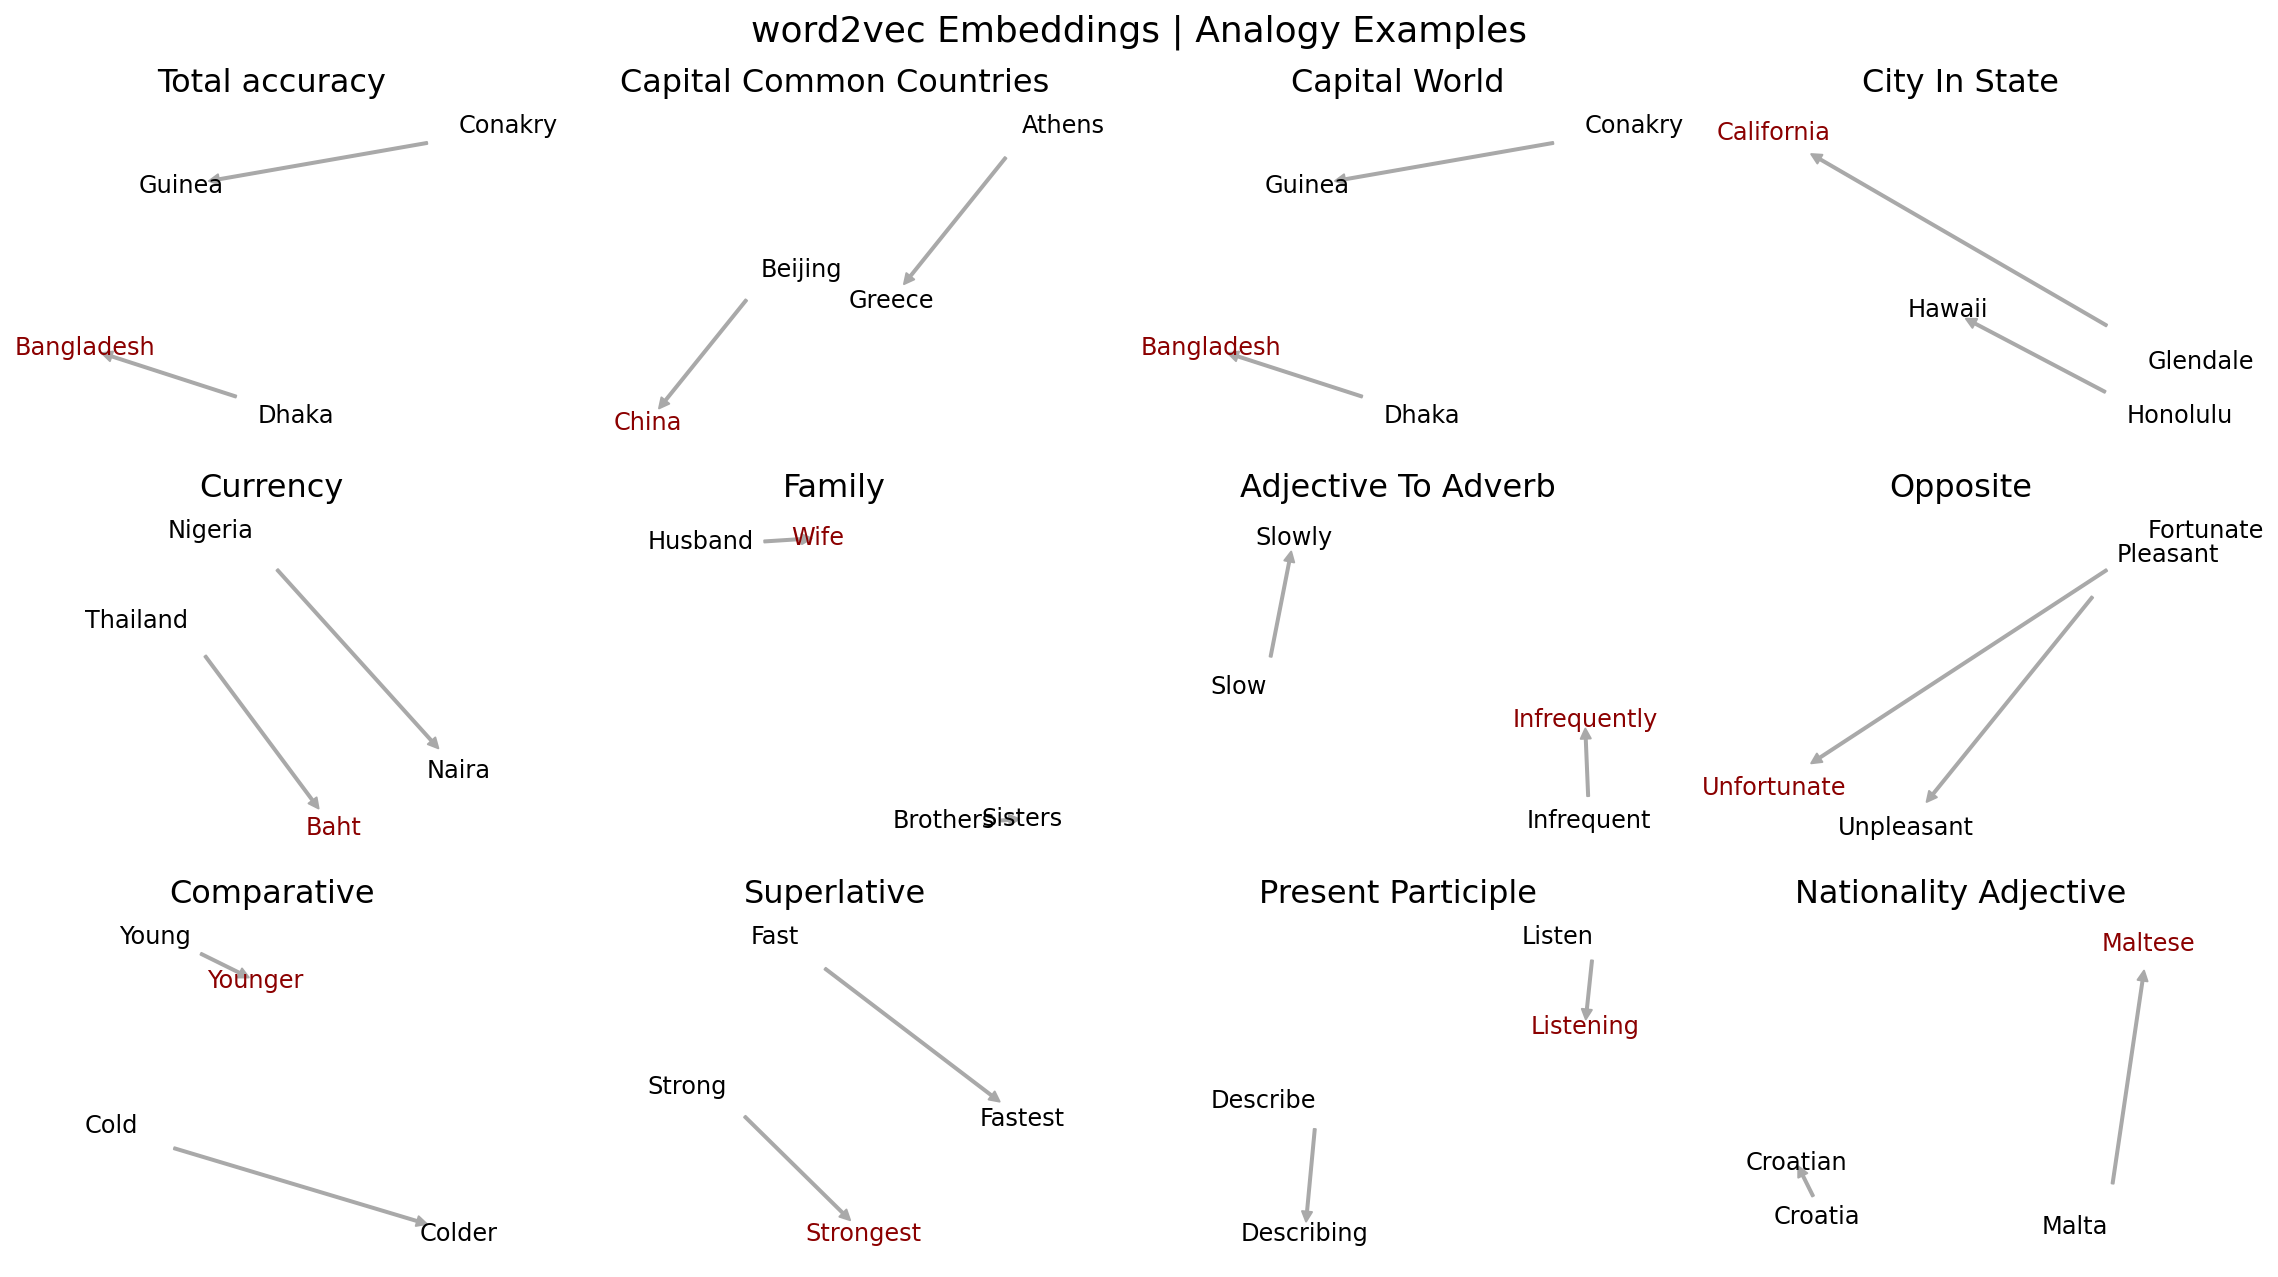

In [55]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 9))
axes = axes.flatten()
fc = ec = "darkgrey"
for s, (section, result) in enumerate(results.groupby("section")):
    if s > 11:
        break

    df = result.drop("section", axis=1).apply(lambda x: x.map(word2id))
    df.dropna(inplace=True)
    v = df.astype(np.int32).values
    most_similar_idx = find_most_similar_analogy(v)

    best_analogy = result.iloc[most_similar_idx, :4].tolist()

    analogy_idx = [words.index(word) for word in best_analogy]
    best_analogy = [a.capitalize() for a in best_analogy]

    coords = pd.DataFrame(vectors2D[analogy_idx])  # xy array

    xlim, ylim = get_plot_lims(coords)
    axes[s].set_xlim(xlim)
    axes[s].set_ylim(ylim)

    for i in [0, 2]:
        axes[s].annotate(
            best_analogy[i],
            xy=coords.iloc[i + 1],
            xytext=coords.iloc[i],
            arrowprops=dict(
                width=1, headwidth=5, headlength=5, fc=fc, ec=ec, shrink=0.1
            ),
            fontsize=12,
        )

        axes[s].annotate(
            best_analogy[i + 1],
            xy=coords.iloc[i + 1],
            xytext=coords.iloc[i + 1],
            va="center",
            ha="center",
            fontsize=12,
            color="darkred" if i == 2 else "k",
        )

    axes[s].axis("off")
    title = " ".join(
        [s.capitalize() for s in section.split("-") if not s.startswith("gram")]
    )
    axes[s].set_title(title, fontsize=16)

fig.suptitle("word2vec Embeddings | Analogy Examples", fontsize=18)
fig.tight_layout()
